In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline
import mpld3
mpld3.enable_notebook()

### Load image and visualize

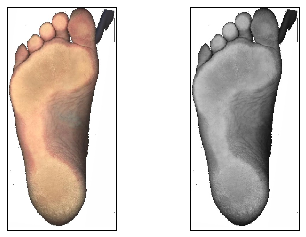

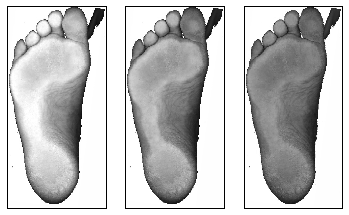

In [2]:
# load image
img = cv2.imread("Art1.JPG")

# get image dimensions
w = img.shape[1]
h = img.shape[0]

# convert to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# visualization of color image and gray-scale
fig1 = plt.figure(1)
plt.subplot(121)
plt.imshow(img_rgb)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.subplot(122)
plt.imshow(img_gray, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

# visualization of all channels separately
fig2 = plt.figure(2)
plt.subplot(131)
plt.imshow(img[:,:,2], cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.subplot(132)
plt.imshow(img[:,:,1], cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.subplot(133)
plt.imshow(img[:,:,0], cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

### Compute binary image of foot region

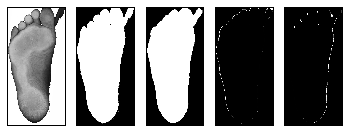

In [3]:
# get binary image via threshold
ret,img_binary = cv2.threshold(img_gray,245,255,0)
img_binary = cv2.bitwise_not(img_binary)

# remove artifacts by opening and closing
element2 = cv2.getStructuringElement(cv2.MORPH_CROSS,(20,20))
img_clean = cv2.morphologyEx(img_binary, cv2.MORPH_OPEN, element2)
img_clean = cv2.morphologyEx(img_clean, cv2.MORPH_CLOSE, element2)

# removed artifavts
img_artifacts_removed = img_binary - img_clean
img_artifacts_added = img_clean - img_binary

fig1 = plt.figure(1)
plt.subplot(151)
plt.imshow(img_gray, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.subplot(152)
plt.imshow(img_binary, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.subplot(153)
plt.imshow(img_clean, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.subplot(154)
plt.imshow(img_artifacts_removed, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.subplot(155)
plt.imshow(img_artifacts_added, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [4]:
# TODO!

# count number of objects

# if more than one object only keep the largest

foot_region = img_clean

### Get clean foot image for further processing

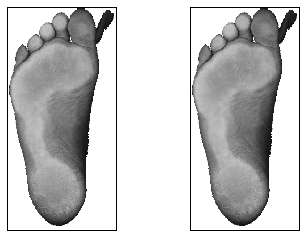

In [5]:
# clean image
img_gray_clean = img_gray
for y in range(0, h): # loop over image
    for x in range(0, w):
        if foot_region[y, x] == 0:
            img_gray_clean[y, x] = 255

fig1 = plt.figure(1)
plt.subplot(121)
plt.imshow(img_gray, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.subplot(122)
plt.imshow(img_gray_clean, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

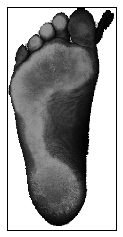

In [6]:
# equalize the histogram
image_equalized = cv2.equalizeHist(img_gray_clean)

# visualization
fig1 = plt.figure(1)
plt.subplot(111)
plt.imshow(image_equalized, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

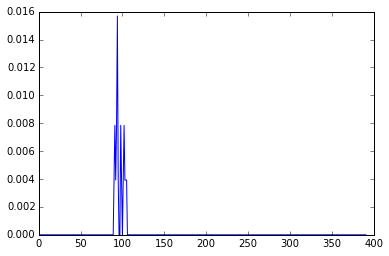

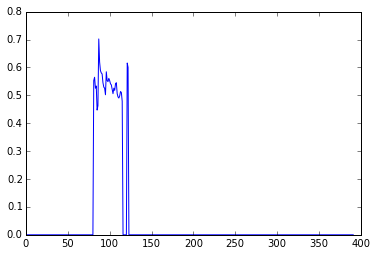

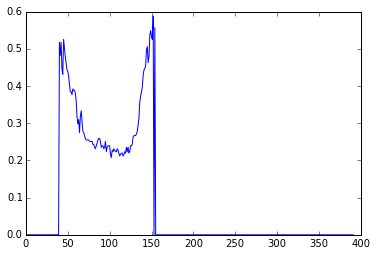

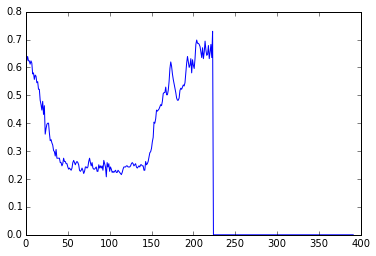

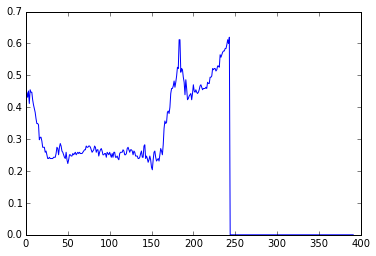

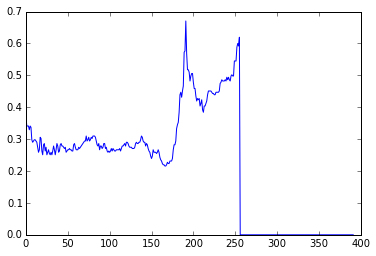

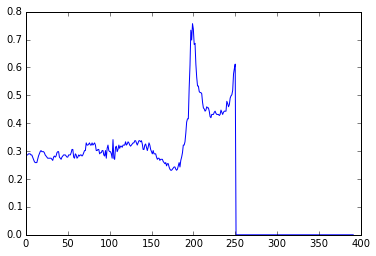

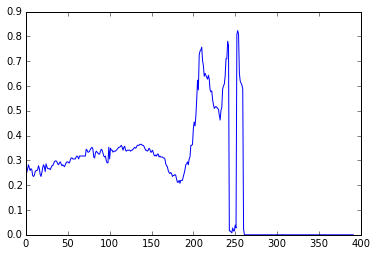

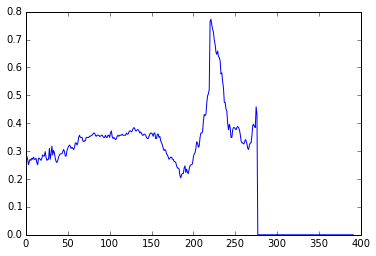

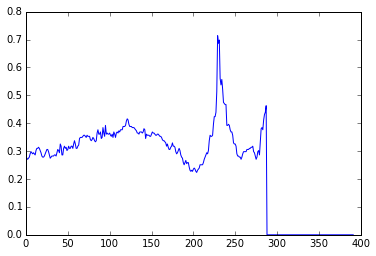

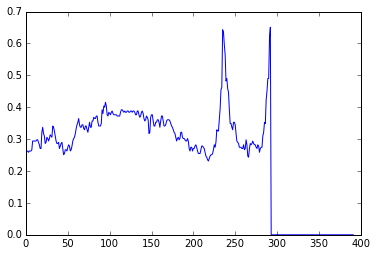

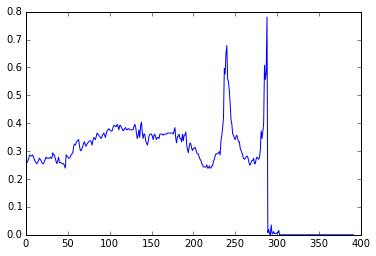

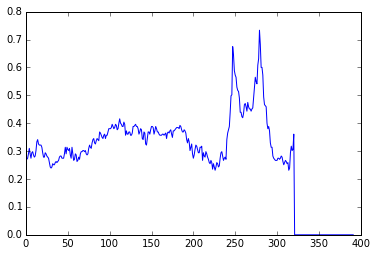

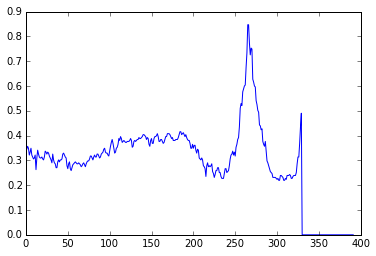

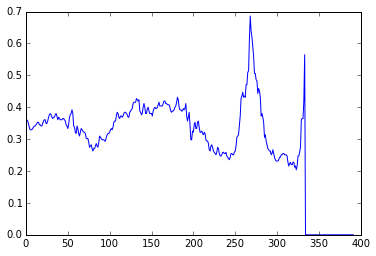

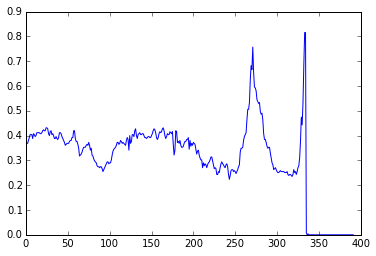

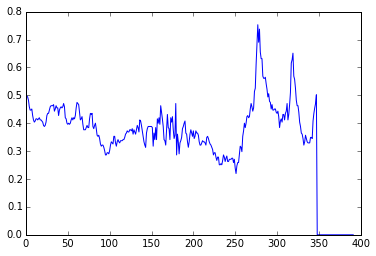

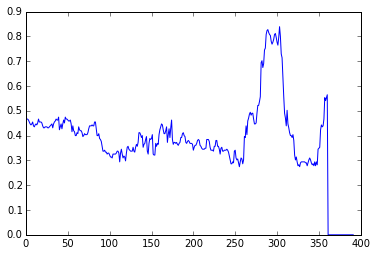

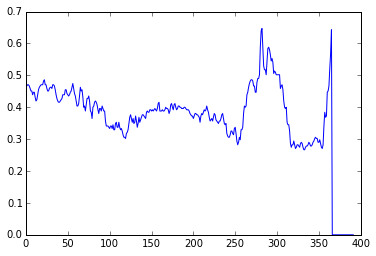

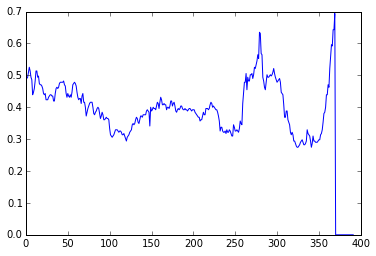

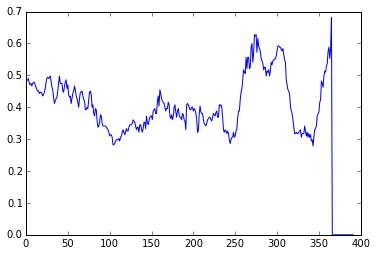

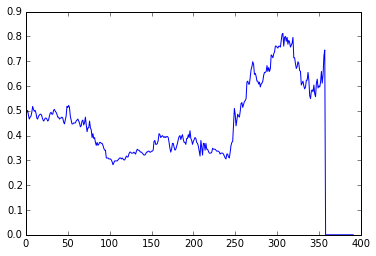

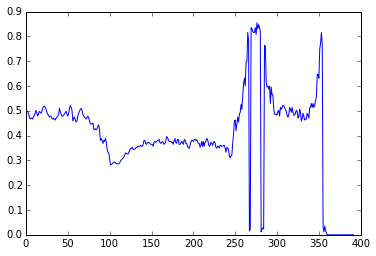

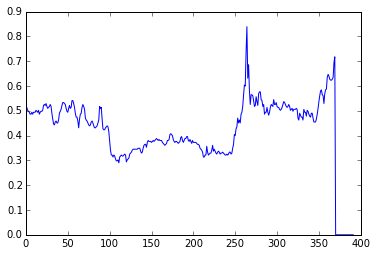

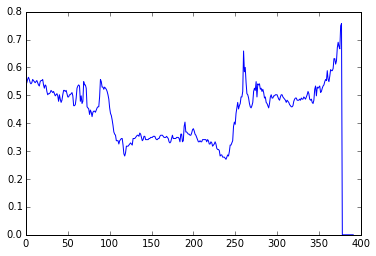

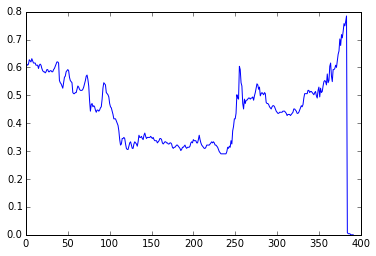

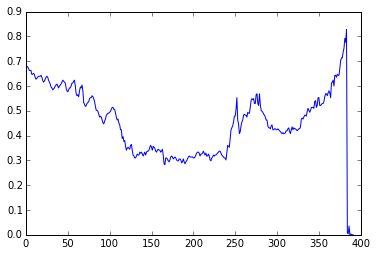

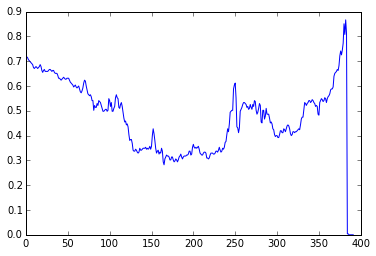

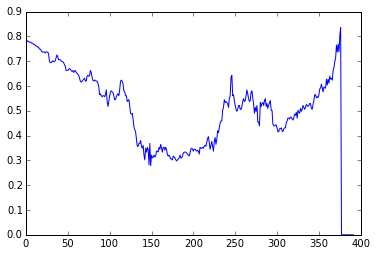

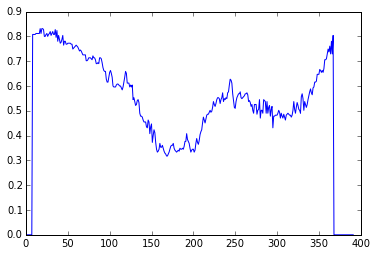

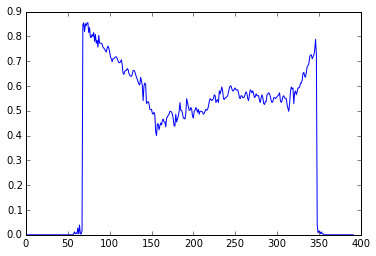

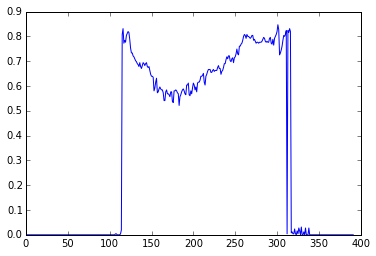

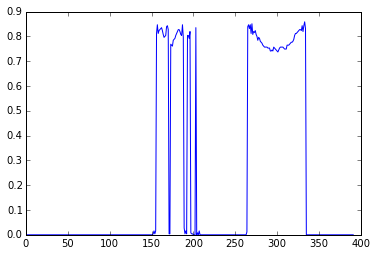

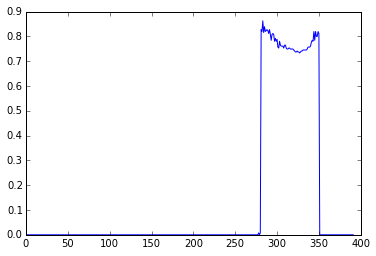

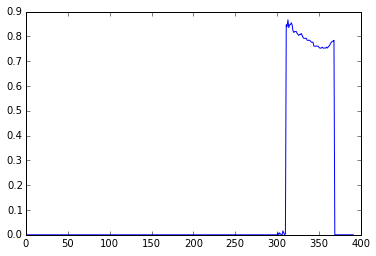

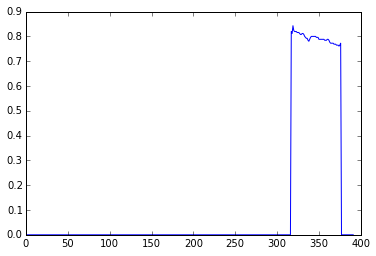

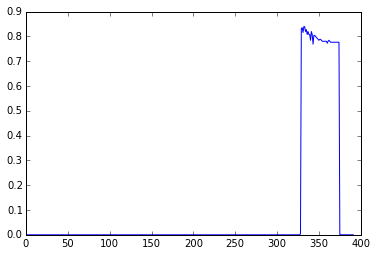

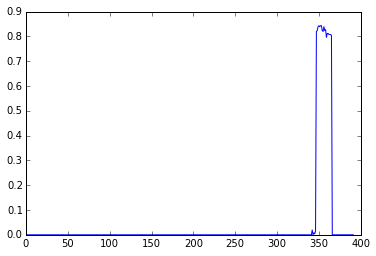

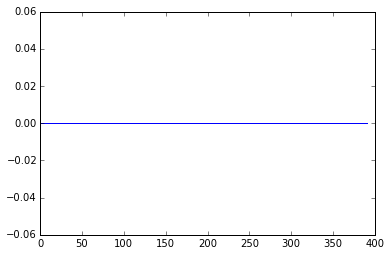

In [7]:
for x in range(0,w,10): 
    signal = 1 - np.flip(img_gray_clean[0:int(0.5*h),x]/255.0,0)
    plt.plot(signal)
    plt.show()

### Extract foot dimensions i.e. length and width

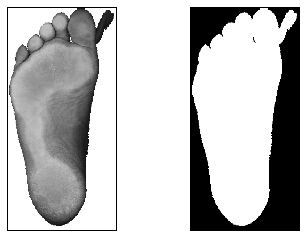

In [8]:
ret,img_tresh = cv2.threshold(img_gray_clean,245,255,0)
img_tresh = cv2.bitwise_not(img_tresh)

fig1 = plt.figure(1)
plt.subplot(121)
plt.imshow(img_gray_clean, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.subplot(122)
plt.imshow(img_tresh, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [9]:
# TODO: do not consider toes!

row_sum = np.sum(img_tresh, axis=1)
column_sum = np.sum(img_tresh, axis=0)

upper_limit = -1
for y in range(0, h): # loop over image columns
    if row_sum[y] > 0:
        upper_limit = y
        #print(upper_limit)
        break
        
lower_limit = -1
for y in range(h-1,-1,-1):
    if row_sum[y] > 0:
        lower_limit = y
        #print(lower_limit)
        break

left_limit = -1
for x in range(0,w):
    if column_sum[x] > 0:
        left_limit = x
        #print(left_limit)
        break
        
right_limit = -1
for x in range(w-1,-1,-1):
    if column_sum[x] > 0:
        right_limit = x
        #print(right_limit)
        break
        
foot_length_dots = lower_limit - upper_limit
foot_length_inch = foot_length_dots/72.0
foot_length_cm = foot_length_inch * 2.54

foot_wigth_dots = right_limit - left_limit
foot_wigth_inch = foot_wigth_dots/72.0
foot_wigth_cm = foot_wigth_inch * 2.54

print("Foot length is " + str(round(foot_length_cm,2)) + " cm.")
print("Foot width is " + str(round(foot_wigth_cm,2)) + " cm.")

Foot length is 26.92 cm.
Foot width is 12.95 cm.


### Compute skeleton (not used right now)

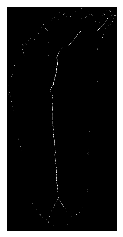

In [10]:
# compute skeleton
img_copy = foot_region

size = np.size(img_copy)
skel = np.zeros(img_copy.shape,np.uint8)

element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
done = False

while( not done):
    eroded = cv2.erode(img_copy,element)
    temp = cv2.dilate(eroded,element)
    temp = cv2.subtract(img_copy,temp)
    skel = cv2.bitwise_or(skel,temp)
    img_copy = eroded.copy()
    
    zeros = size - cv2.countNonZero(img_copy)
    if zeros == size:
        done = True
        
fig1 = plt.figure(1)
plt.subplot(111)
plt.imshow(skel, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

### Get binary image of interesting contours

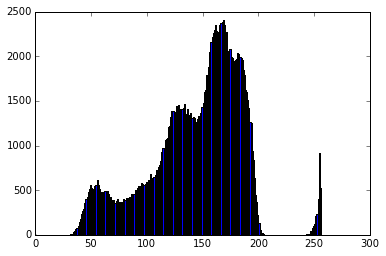

In [11]:
# compute histogram of gray-scale image only considering foot region
mask = foot_region.ravel()

arr = img_gray.ravel()
arr = arr[mask > 0]
plt.hist(arr,256,[0,256])
plt.show()

In [12]:
#mask = foot_region.ravel()

## histogram 
#color = ('b','g','r')
#for i,col in enumerate(color):
#    arr = img[:,:,i].ravel()
#    arr = arr[mask > 0]
#    plt.hist(arr,256,[0,256],color = col)
#    plt.show()

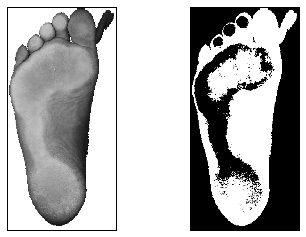

In [13]:
ret,img_tresh = cv2.threshold(img_gray_clean,170,255,0)
img_tresh = cv2.bitwise_not(img_tresh)

fig1 = plt.figure(1)
plt.subplot(121)
plt.imshow(img_gray_clean, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.subplot(122)
plt.imshow(img_tresh, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

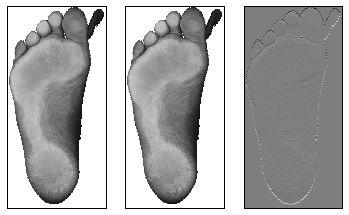

In [14]:
# use gaussian filter as pre-processing step (otherwise edge detection does not work well)
img_filtered = cv2.GaussianBlur(img_gray_clean,(1,1),0)

# do edge detection on grayscale image
img_edges = cv2.Sobel(img_filtered,cv2.CV_64F,0,1,ksize=5)

# visualization
fig1 = plt.figure(1)
plt.subplot(131)
plt.imshow(img_gray_clean, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.subplot(132)
plt.imshow(img_filtered, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.subplot(133)
plt.imshow(img_edges, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

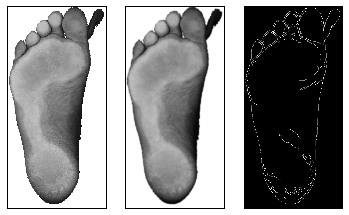

In [15]:
# use gaussian filter as pre-processing step (otherwise edge detection does not work well)
img_filtered = cv2.GaussianBlur(img_gray_clean,(9,9),0)

# do edge detection on grayscale image
img_edges = cv2.Canny(img_filtered,10,60)

# visualization
fig1 = plt.figure(1)
plt.subplot(131)
plt.imshow(img_gray_clean, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.subplot(132)
plt.imshow(img_filtered, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.subplot(133)
plt.imshow(img_edges, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

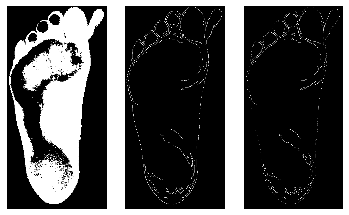

In [16]:
img_contours = cv2.bitwise_and(img_tresh, img_edges)

# visualization
fig1 = plt.figure(1)
plt.subplot(131)
plt.imshow(img_tresh, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.subplot(132)
plt.imshow(img_edges, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.subplot(133)
plt.imshow(img_contours, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

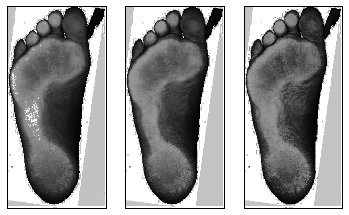

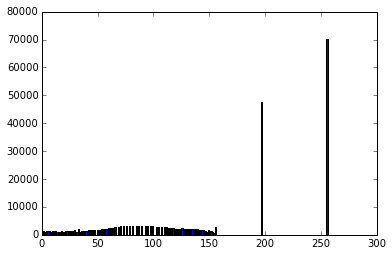

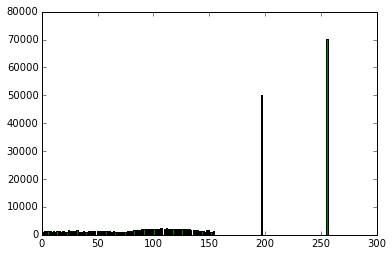

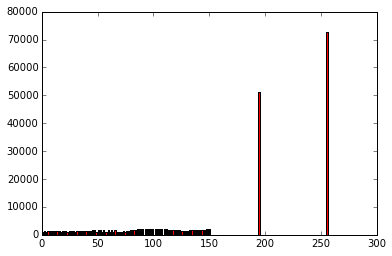

In [17]:
image_equalized = img

# equalize the histogram of the green channel
image_equalized[:,:,0] = cv2.equalizeHist(img[:,:,0])
image_equalized[:,:,1] = cv2.equalizeHist(img[:,:,1])
image_equalized[:,:,2] = cv2.equalizeHist(img[:,:,2])

# visualization
fig1 = plt.figure(1)
plt.subplot(131)
plt.imshow(image_equalized[:,:,2], cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.subplot(132)
plt.imshow(image_equalized[:,:,1], cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.subplot(133)
plt.imshow(image_equalized[:,:,0], cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

# histogram
color = ['b','g','r']
for i,col in enumerate(color):
    plt.hist(img[:,:,i].ravel(),256,[0,256],color = col)
    plt.show()